<a href="https://colab.research.google.com/github/DanaGuber/MachineLearning/blob/main/Clase2_problema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
from scipy.stats import linregress
from scipy.optimize import curve_fit
import seaborn as sns
from numpy.random import seed
from numpy.random import poisson
from scipy.stats import kstest
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '.container { width:100% !important; } '
            '</style>'
))

In [ ]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'

df = pd.read_csv(url)
df

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


In [ ]:
#Quiero ver que pasa con todo esto respecto al tiempo
dates= df['fecha']
tiempo=[datetime.strptime(date, "%Y-%m-%d").date() for date in dates]

In [ ]:
def graficos4(x1,x2):
  plt.figure(figsize=(20,20))
  plt.subplot(2,2,1)
  plt.scatter(tiempo, x1,label=x1.name)
  plt.xlabel("tiempo")
  plt.ylabel(x1.name)
  plt.title(x1.name)
  plt.legend()
  plt.subplot(2,2,2)
  plt.hist(x1, bins=30)
  plt.xlabel(x1.name)
  plt.title(x1.name)
  plt.subplot(2,2,3)
  plt.scatter(tiempo, x2, label=x2.name)
  plt.xlabel("tiempo")
  plt.ylabel(x2.name)
  plt.title(x2.name)
  plt.legend()
  plt.subplot(2,2,4)
  plt.hist(x2, bins=30)
  plt.xlabel(x2.name)
  plt.title(x2.name)

  


In [ ]:
def graficos2(x1):
  plt.figure(figsize=(20,20))
  plt.subplot(2,2,1)
  plt.scatter(tiempo, x1,label=x1.name)
  plt.xlabel("tiempo")
  plt.ylabel(x1.name)
  plt.title(x1.name)
  plt.legend()
  plt.subplot(2,2,2)
  plt.hist(x1, bins=30)
  plt.xlabel(x1.name)
  plt.title(x1.name)
 

(KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0))

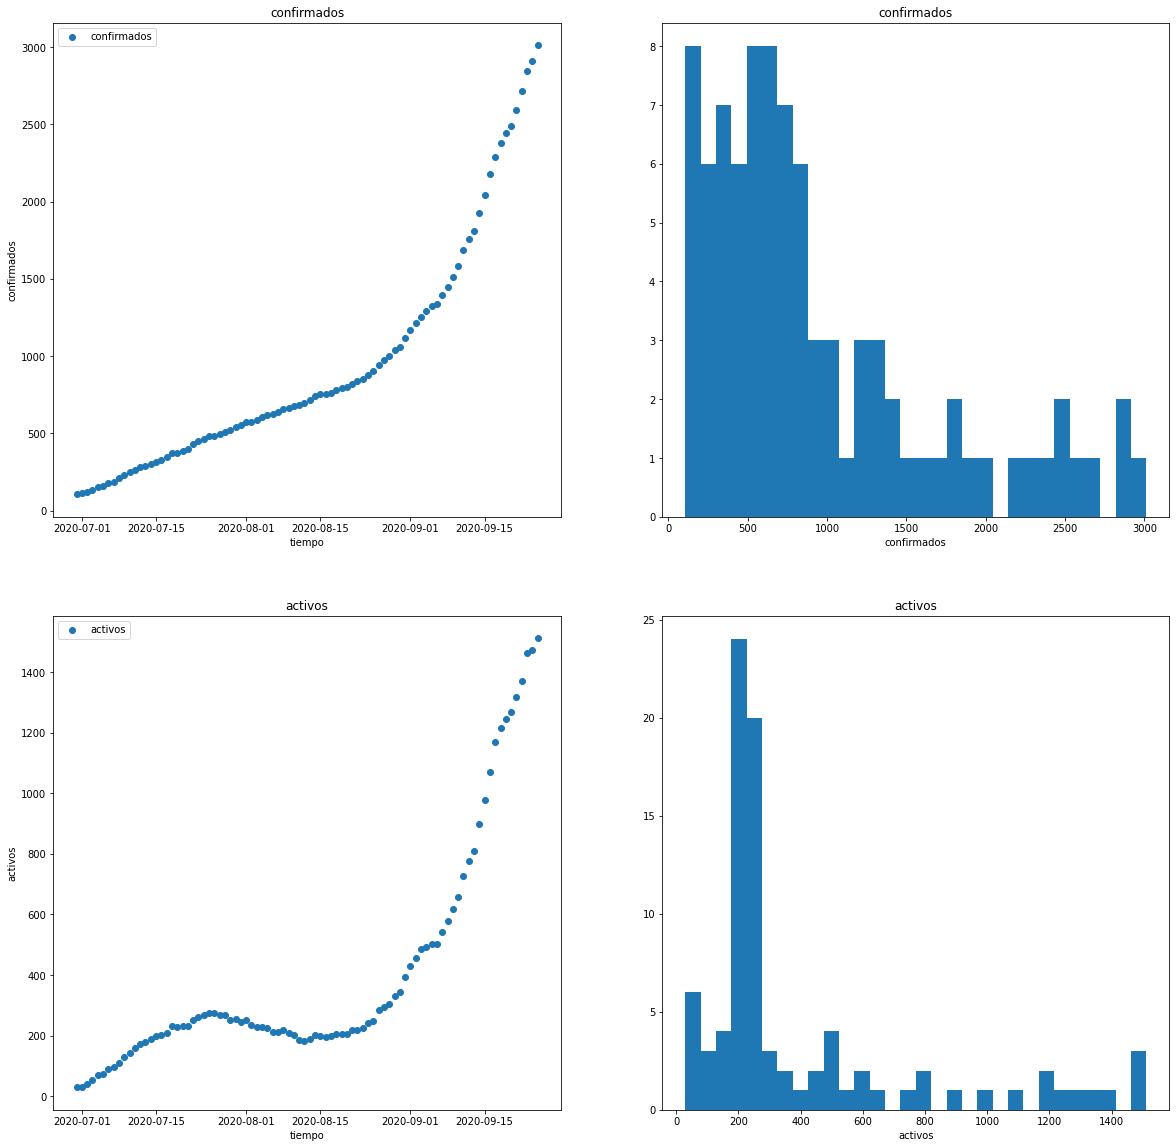

In [ ]:
graficos4(df['confirmados'],df['activos'])
#Kolmogorov-Smirnov test
kstest(df['confirmados'], 'norm'), kstest(df['activos'], 'norm')

(KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=0.9999999990134123, pvalue=0.0))

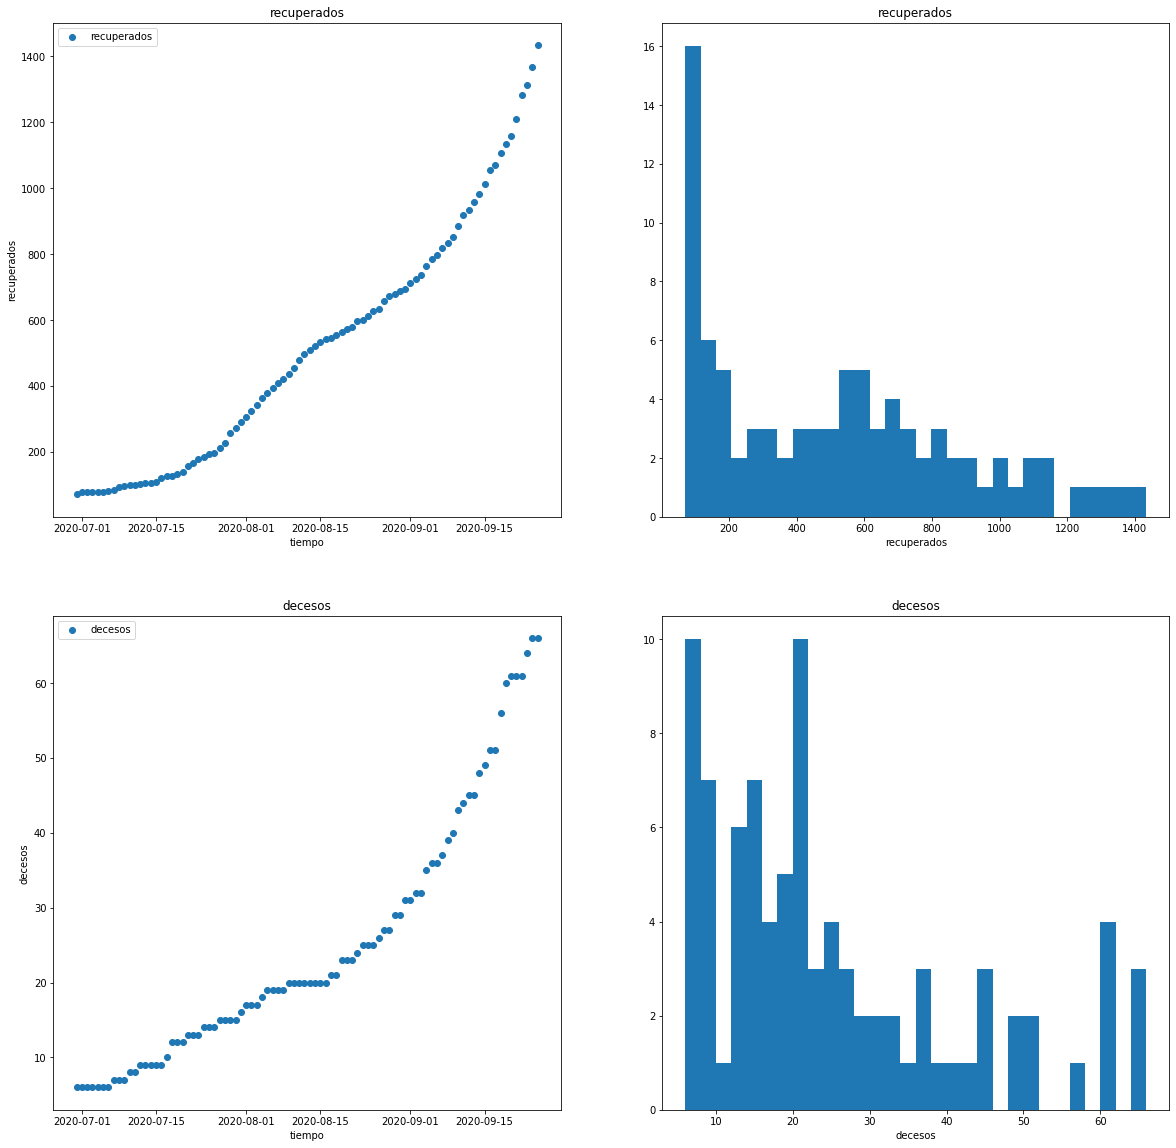

In [ ]:
graficos4(df['recuperados'],df['decesos'])
#Kolmogorov-Smirnov test
kstest(df['recuperados'], 'norm'), kstest(df['decesos'], 'norm')


(KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0))

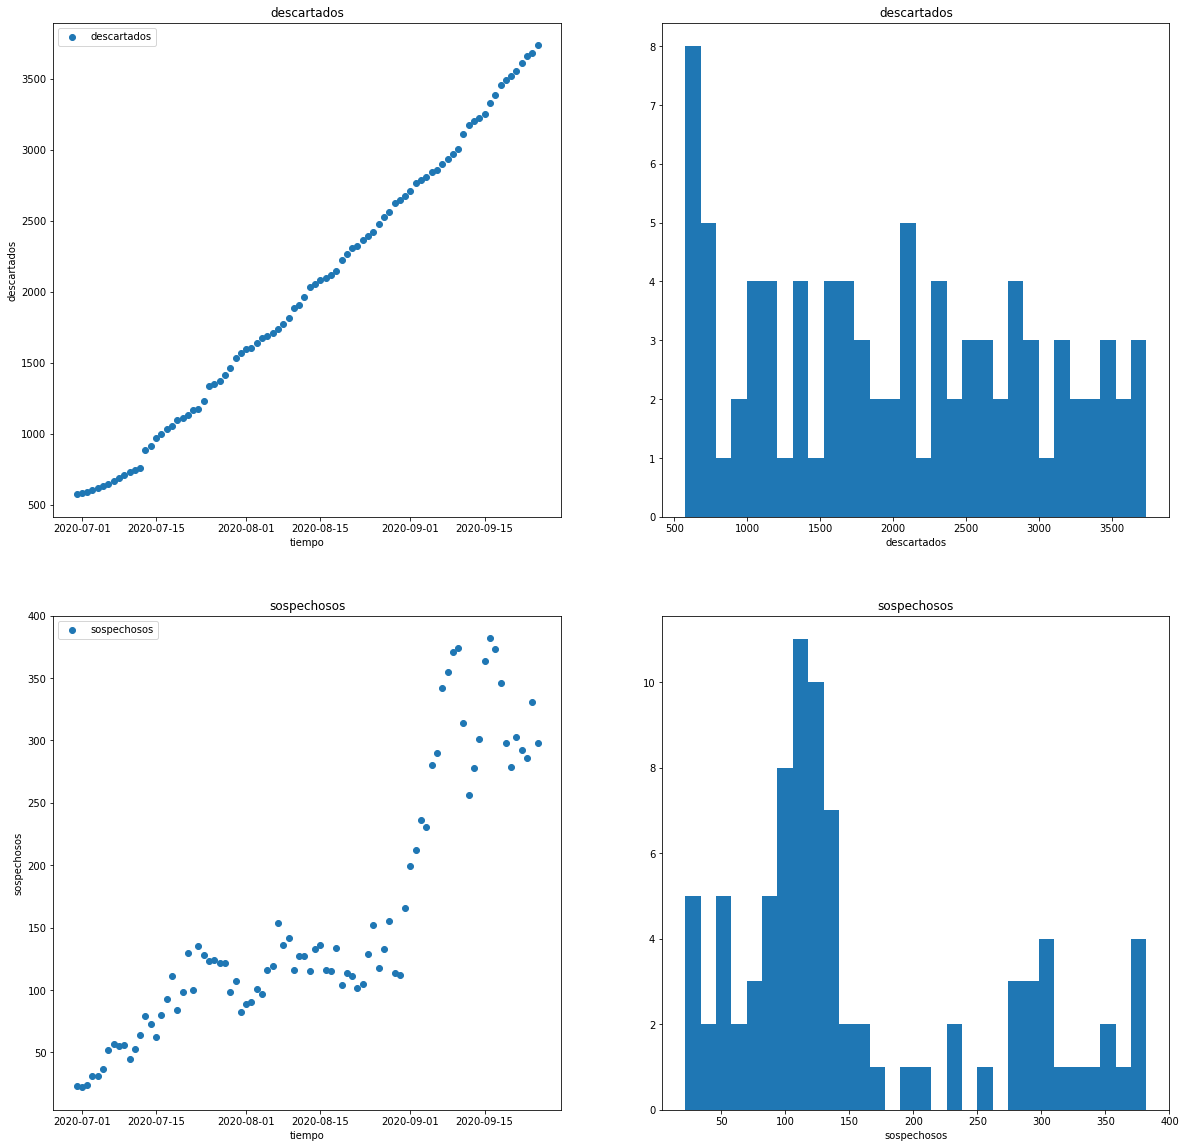

In [ ]:
graficos4(df['descartados'],df['sospechosos'])
#Kolmogorov-Smirnov test
kstest(df['descartados'], 'norm'), kstest(df['sospechosos'], 'norm')

(KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=1.0, pvalue=0.0))

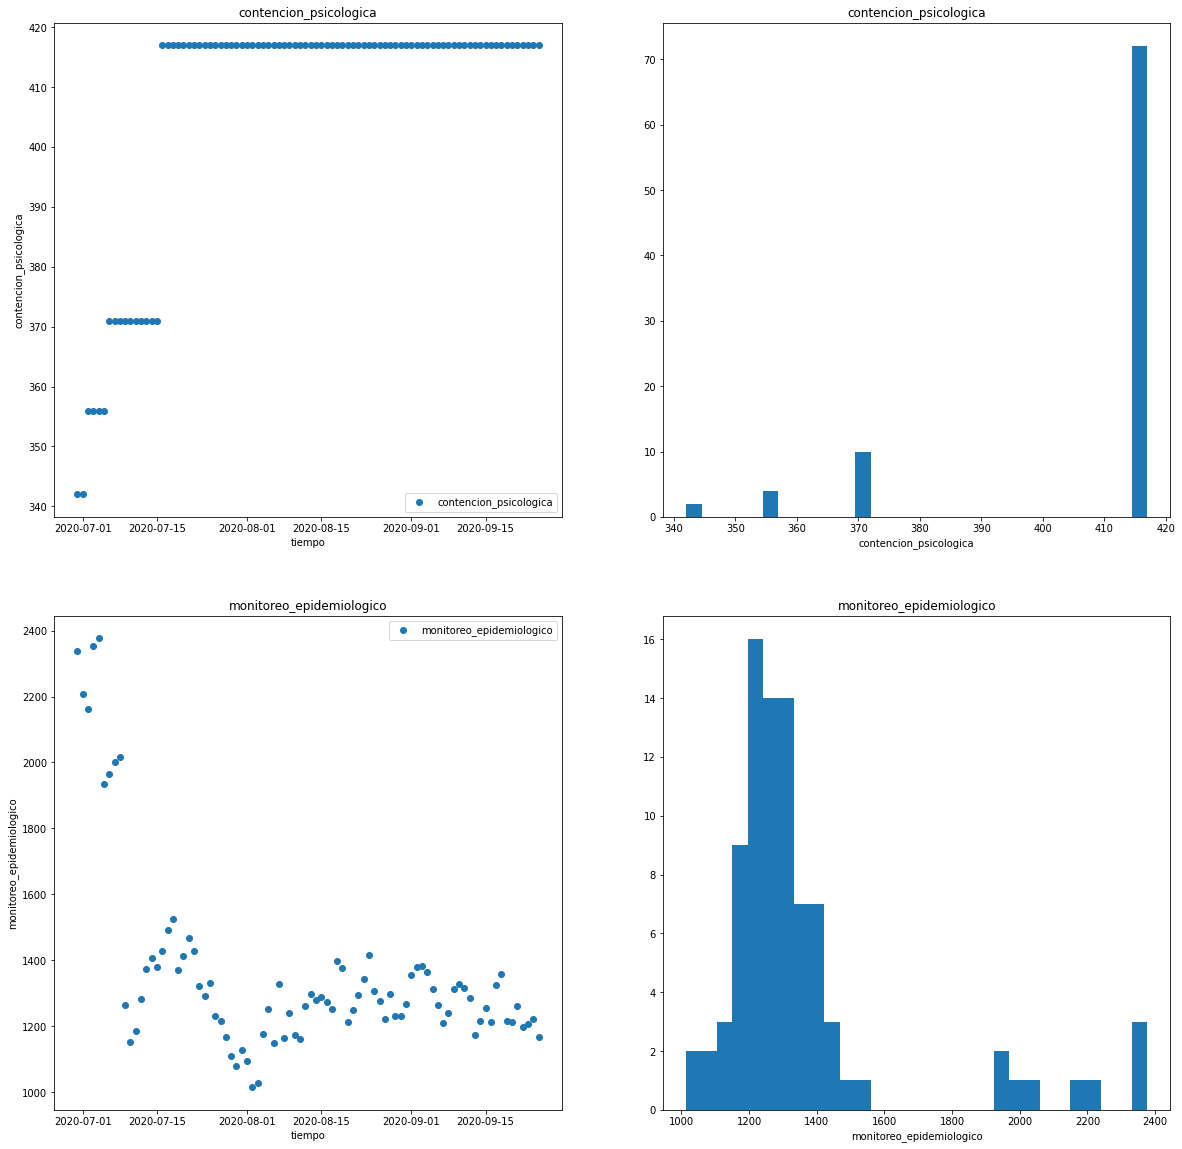

In [ ]:
graficos4(df['contencion_psicologica'],df['monitoreo_epidemiologico'])
#Kolmogorov-Smirnov test
kstest(df['contencion_psicologica'], 'norm'), kstest(df['monitoreo_epidemiologico'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

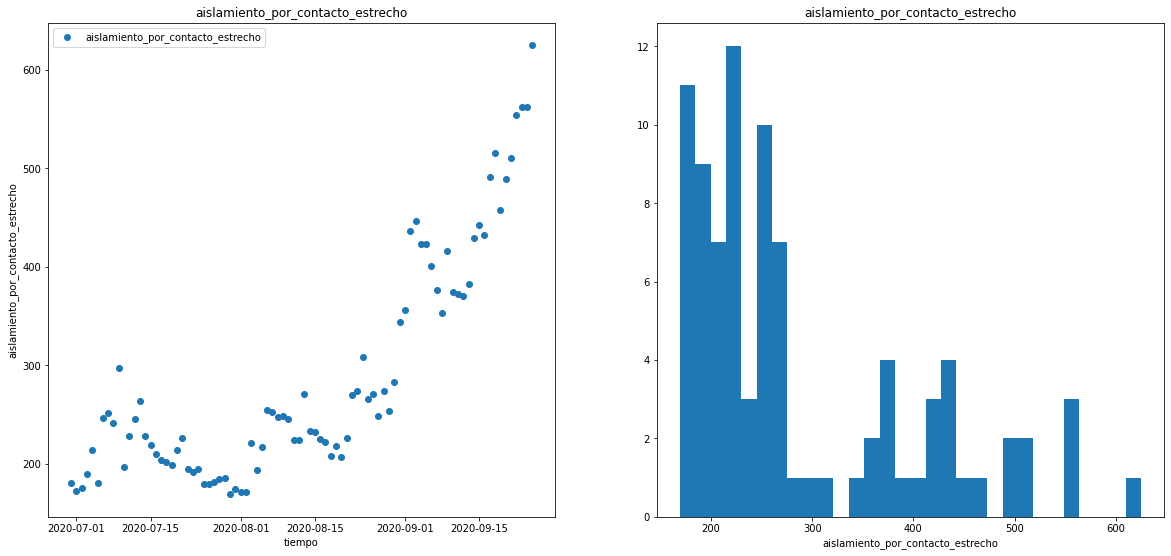

In [ ]:
graficos2(df['aislamiento_por_contacto_estrecho'])
#Kolmogorov-Smirnov test
kstest(df['aislamiento_por_contacto_estrecho'], 'norm')

In [ ]:
#Los gráficos llamativos en este caso son los de contención psicológica, que presentaron aumentos abruptos que luego se mantenían constantes, para finalmente sostener el mismo valor en la mayor subida de casos. Lo cual indica que pese a
#el aumento de casos hubo un punto donde esto dejó de crecer, ya sea porque no había manera de brindar atención psicológica a más personas (lo más probable), o bien que la demanda de esto bajó.
#puede relacionarse también a una adaptación de la población a esta problemática, naturalizando la situación de aislamiento y la posibilidad de tener covid. Para esas fechas ya circulaba más información del virus, lo cual puede haber generado más tranquilidad en la población.
#El monitoreo epidemiológico es alto cuando los casos son menos, y dismuye cuando estos aumentan. Si bien oscila disminuye considerablemente respecto a los valores iniciales. Esto puede deberse a la imposibilidad de hacer seguimiento de tantos casos.
#Los histogramas más llamativos son los de monitoreo y contención, donde vuelve a verse lo mencionado anteriormente. La contención mayormente se mantiene constante en un valor alto. Y en monitoreo se ven bajas frecuencias en valores altos, y altas en valores bajos, debido a la caida en el monitoreo respecto al tiempo.
#Realicé el test Kolmogorov-Smirnov y en ningun conjunto de datos se puede asegurar una distribución normal.

In [ ]:
df['act_conf']=df['activos']/df['confirmados']

df['conf_recup']=df['confirmados']/df['recuperados']

df['act_recup']=df['activos']/df['recuperados']

df['recup_dec']=df['recuperados']/df['decesos']

df['conf_dec']=df['confirmados']/df['decesos']

df['desc_conf']=df['descartados']/df['confirmados']

df['act_ais']=df['activos']/df['aislamiento_por_contacto_estrecho']

df['monit_act']=df['monitoreo_epidemiologico']/df['activos']

In [ ]:
df2 = pd.DataFrame({'act_conf':df.act_conf,
                   'conf_recup':df.conf_recup,
                   'act_recup':df.act_recup,
                   'recup_dec':df.recup_dec,
                   'conf_dec':df.conf_dec,
                   'desc_conf':df.desc_conf,
                   'act_ais':df.act_ais,
                   'monit_act':df.monit_act})
df2

,act_conf,conf_recup,act_recup,recup_dec,conf_dec,desc_conf,act_ais,monit_act
0,0.273585,1.492958,0.408451,11.833333,17.666667,5.415094,0.160221,80.620690
1,0.271930,1.480519,0.402597,12.833333,19.000000,5.096491,0.180233,71.193548
2,0.322581,1.589744,0.512821,13.000000,20.666667,4.741935,0.227273,54.050000
3,0.386861,1.756410,0.679487,13.000000,22.833333,4.423358,0.278947,44.396226
4,0.454545,1.974359,0.897436,13.000000,25.666667,4.038961,0.327103,33.957143
...,...,...,...,...,...,...,...,...
83,0.509463,2.141439,1.090984,19.819672,42.442623,1.373890,2.586275,0.956027
84,0.505158,2.117005,1.069423,21.016393,44.491803,1.331982,2.474729,0.873085
85,0.515312,2.163747,1.115004,20.515625,44.390625,1.287575,2.604982,0.823770
86,0.507226,2.127379,1.079063,20.696970,44.030303,1.267034,2.622776,0.828358


(KstestResult(statistic=0.6008743775338826, pvalue=6.365657419101945e-31),
 KstestResult(statistic=0.918577050663215, pvalue=2.8031875721895524e-96))

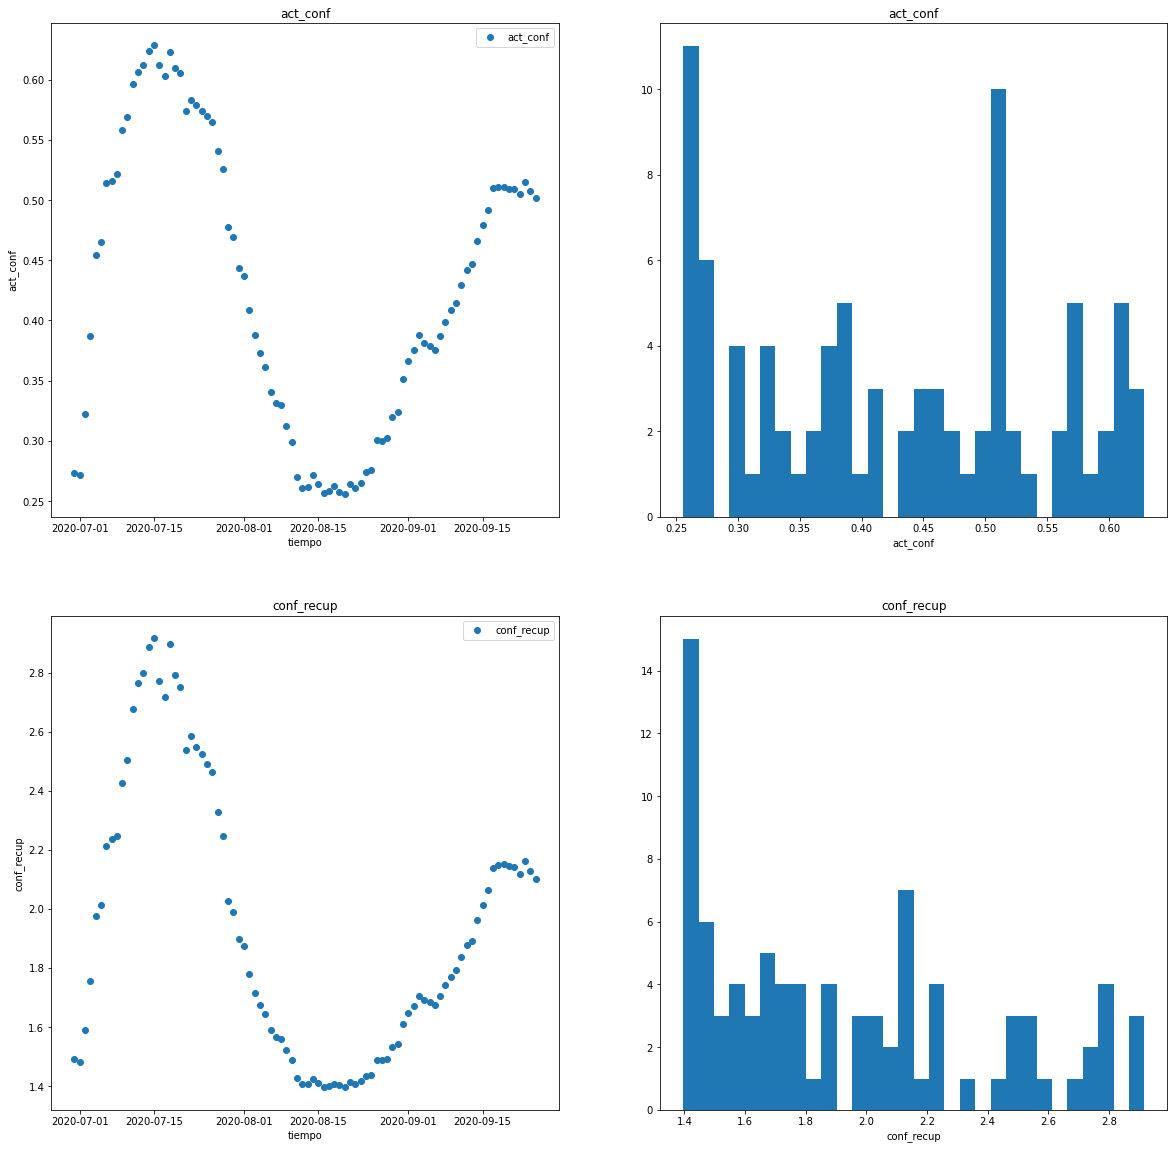

In [ ]:
graficos4(df['act_conf'],df['conf_recup'])
#Kolmogorov-Smirnov test
kstest(df['act_conf'], 'norm'), kstest(df['conf_recup'], 'norm')

(KstestResult(statistic=0.6395075690491646, pvalue=1.606639065453004e-35),
 KstestResult(statistic=1.0, pvalue=0.0))

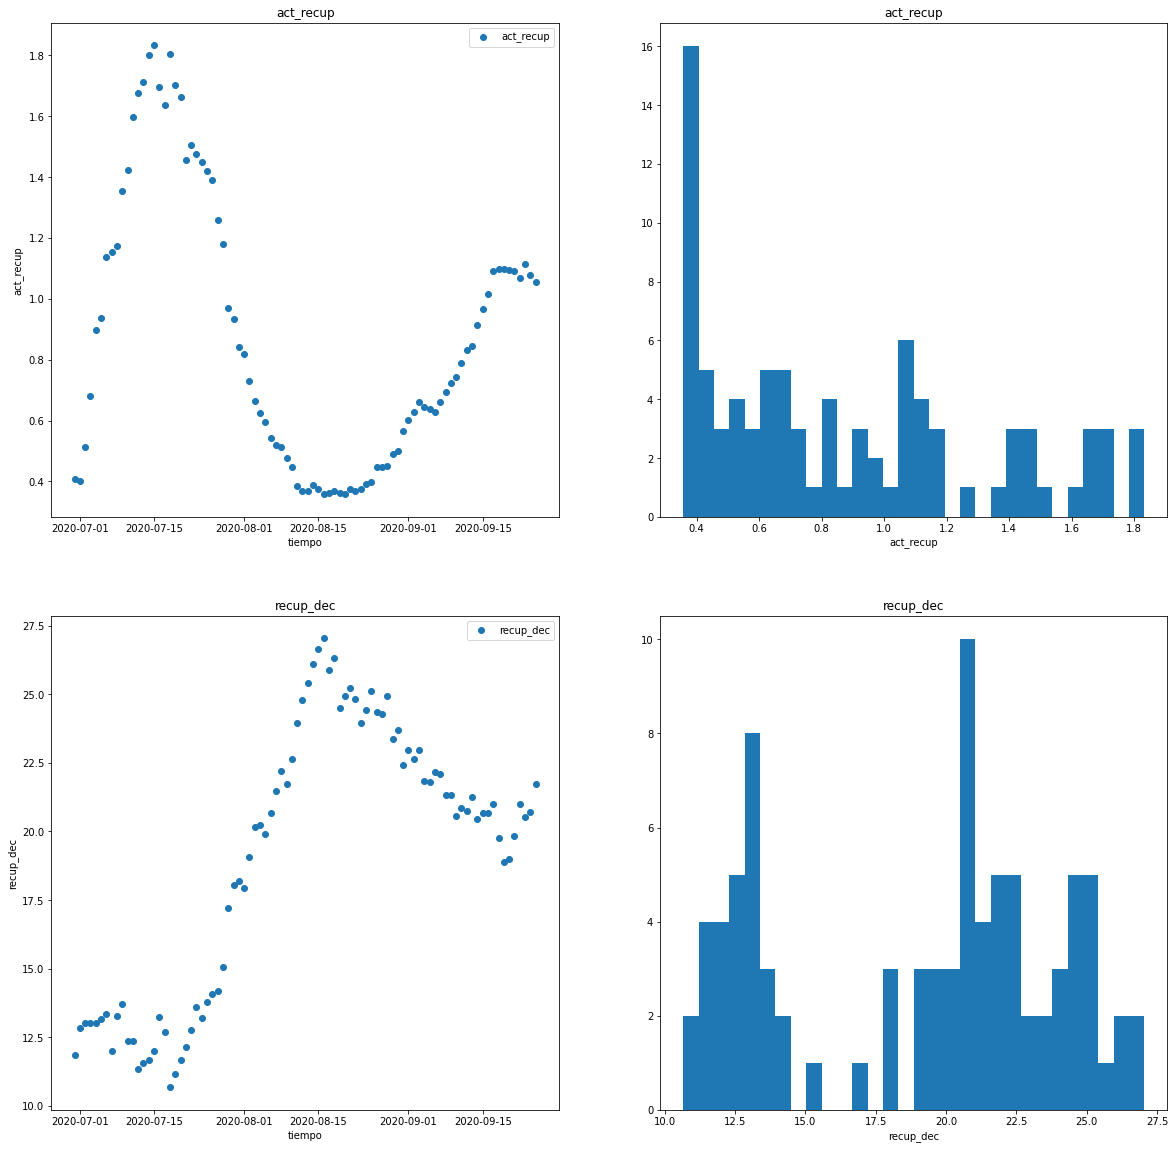

In [ ]:
graficos4(df['act_recup'],df['recup_dec'])
#Kolmogorov-Smirnov test
kstest(df['act_recup'], 'norm'), kstest(df['recup_dec'], 'norm')

(KstestResult(statistic=1.0, pvalue=0.0),
 KstestResult(statistic=0.892703748410813, pvalue=1.0255486290215044e-85))

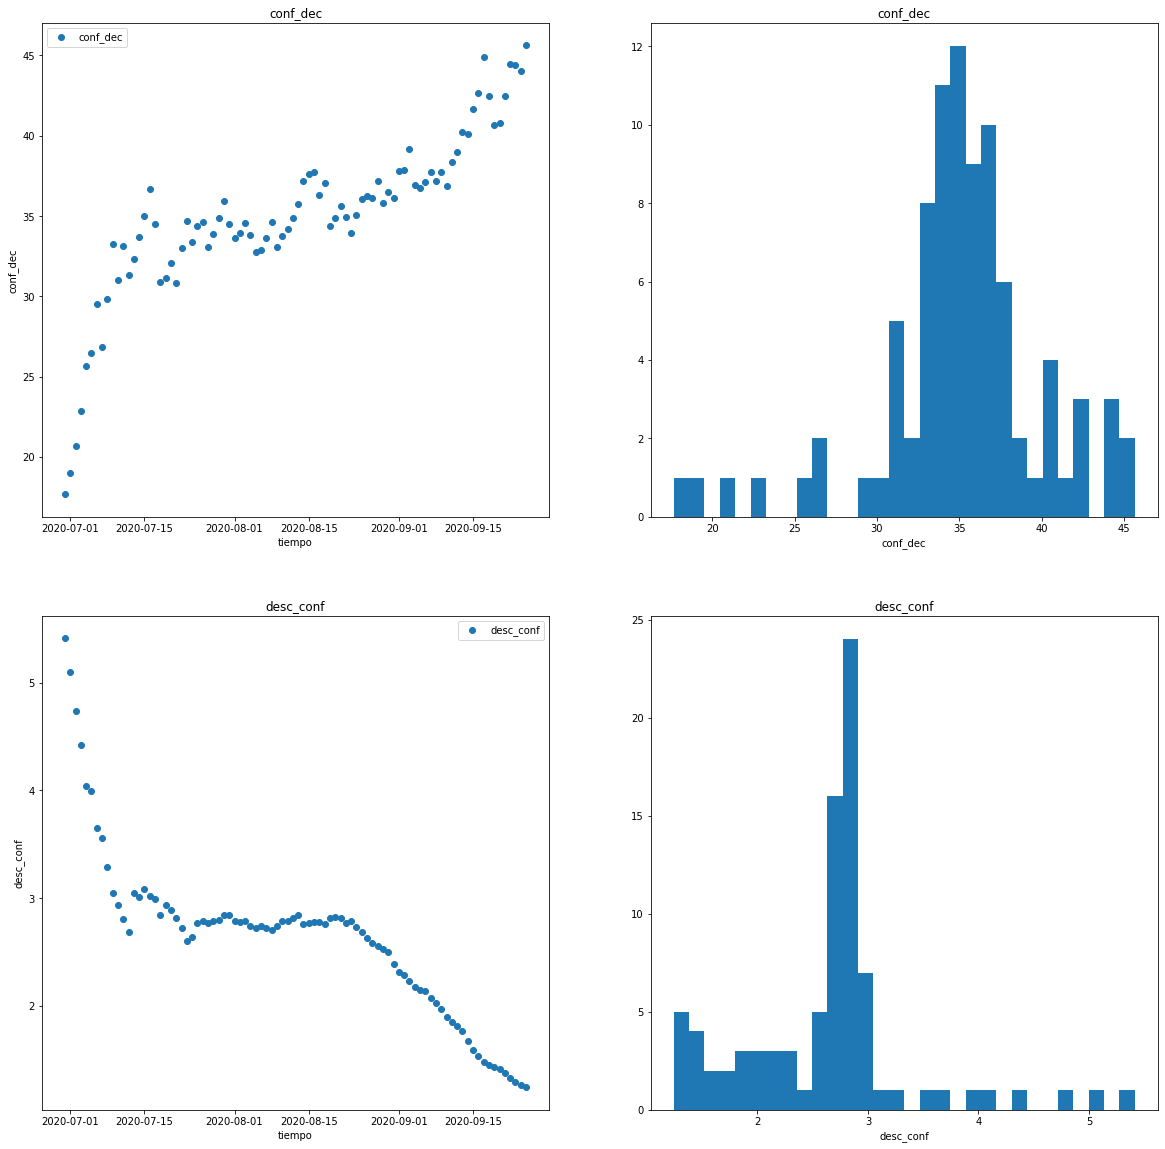

In [ ]:
graficos4(df['conf_dec'],df['desc_conf'])
#Kolmogorov-Smirnov test
kstest(df['conf_dec'], 'norm'), kstest(df['desc_conf'], 'norm')

(KstestResult(statistic=0.636285035414672, pvalue=4.0501077437373865e-35),
 KstestResult(statistic=0.807762166604854, pvalue=9.356197176921901e-63))

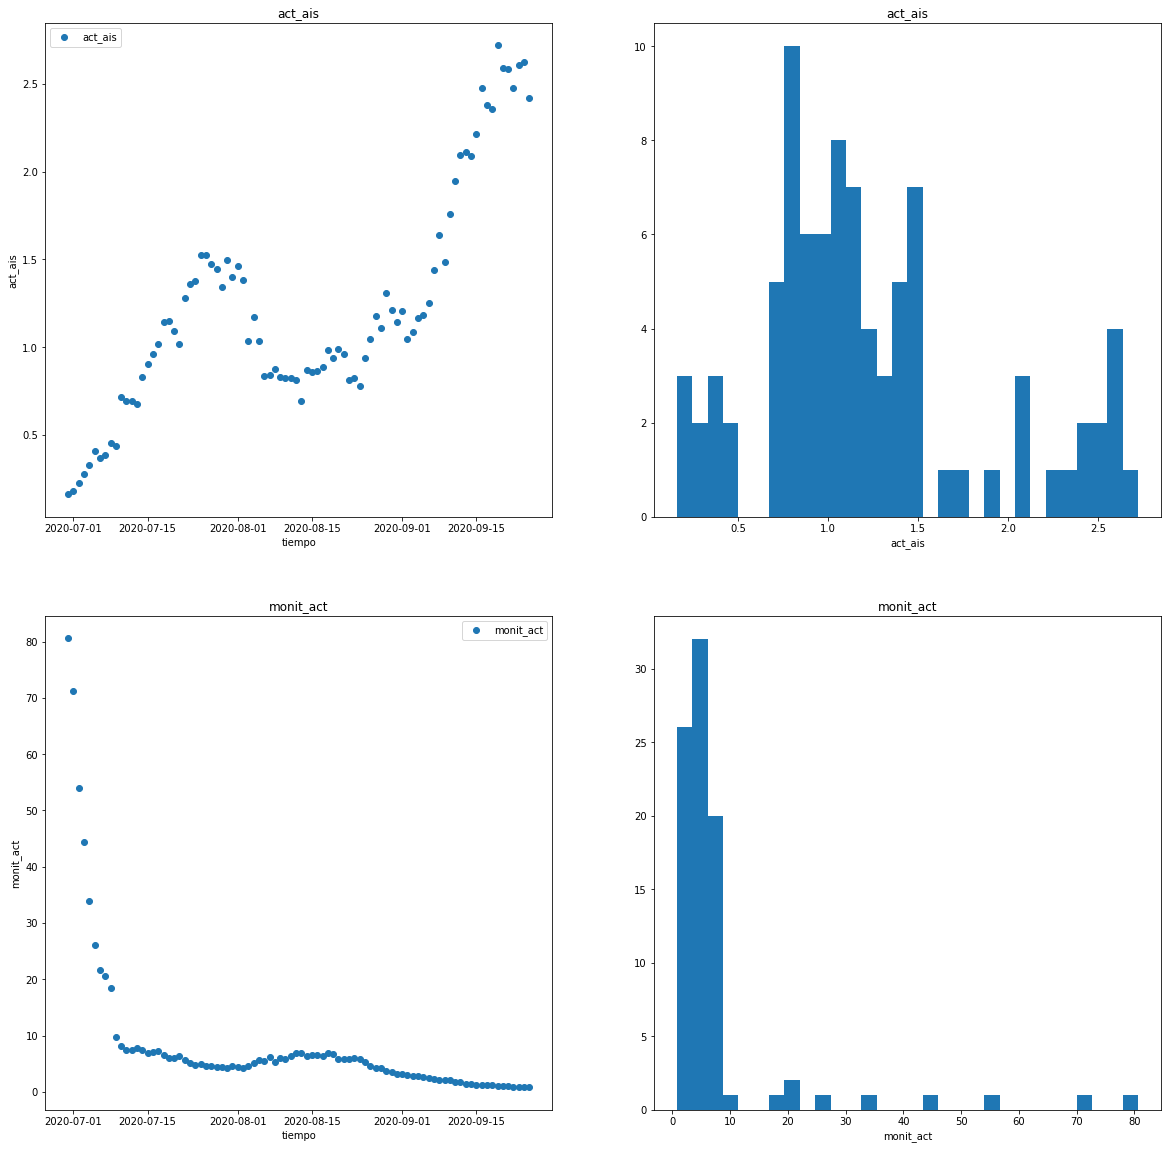

In [ ]:
graficos4(df['act_ais'],df['monit_act'])
#Kolmogorov-Smirnov test
kstest(df['act_ais'], 'norm'), kstest(df['monit_act'], 'norm')